## Las librerías que vamos a utilizar en el proyecto

In [1010]:
import scipy as sp
import itertools
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [439]:
plt.rcParams["figure.figsize"] = (12,8)

In [270]:
from ipywidgets import interact
import ipywidgets as widgets

## El Dataset que vamos a utilizar para este proyecto e Inspeccionamos la información

In [77]:
df=pd.read_csv("Video_Games_2016.csv")

In [78]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [10]:
df.shape

(16719, 16)

In [15]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Inspeccionamos la cantidad de Null values que hay en el DataSet

In [79]:
df.isnull().sum()*100 / len(df) # I will remove that columns that have more than 40 percent of the data

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

In [16]:
df.nunique(axis=0)

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [80]:
df.Developer.value_counts(dropna=False) # de esta forma identificamos los valores nulos y los contamos 

NaN                 6623
Ubisoft              204
EA Sports            172
EA Canada            167
Konami               162
                    ... 
Big Red Software       1
K2, Kurogane           1
Enterbrain             1
Metro3D                1
2K Shanghai            1
Name: Developer, Length: 1697, dtype: int64

In [82]:
df.isnull().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Limpiamos el DataSet

In [83]:
df.drop(columns=["Critic_Score","Critic_Count","User_Score","User_Count","Rating","Developer"], inplace= True)

In [600]:
df.drop(columns=["Platform"], inplace= True)

In [85]:
df.rename(columns={"Publisher":"Developer"}, inplace=True)

In [90]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Developer          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [88]:
df.shape

(16717, 10)

In [86]:
df['Year_of_Release'] = df['Year_of_Release'].fillna(0000.0)
df['Developer'] = df['Developer'].fillna('No info')
df['Name'] = df['Name'].fillna('No info')

In [87]:
df.drop(df[df.Name == "No info"].index, inplace=True)

In [ ]:
df[df.Year_of_Release == 0.0]

In [101]:
df.drop(df[df.Year_of_Release == 0.0 ].index, inplace=True) # This information is not relevant for my project

## Descripción de las columnas del DataSet con el que vamos a trabajar

Name - The games name

Year - Year of the game's release

Genre - Genre of the game

Developer - The creator of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales(in millions).

## Apreciación del DataSet por Desarrollador

In [601]:
@interact(Developer=df.Developer.unique())
def explore(Developer): 
    display(df[df.Developer==Developer])

interactive(children=(Dropdown(description='Developer', options=('Nintendo', 'Microsoft Game Studios', 'Take-T…

## Apreciación del Data Set por Desarrollador and Año

In [602]:
@interact(Developer=df.Developer.unique() , Year_of_Release=df.Year_of_Release.sort_values(ascending=True).unique())
def explore(Developer , Year_of_Release): 
    
    display(df[df.Developer==Developer] , df[df.Year_of_Release==Year_of_Release])

interactive(children=(Dropdown(description='Developer', options=('Nintendo', 'Microsoft Game Studios', 'Take-T…

## Cuáles son los 20 videojuegos más vendidos a nivel Golbal

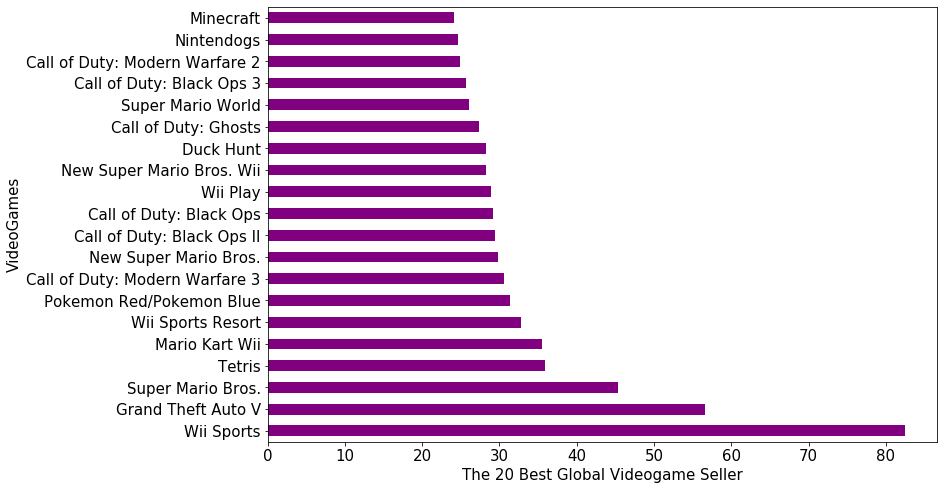

In [1023]:
df.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False).head(20).plot(kind="barh", fontsize=15, color="purple")
plt.ylabel("VideoGames", fontsize=15)
plt.xlabel("The 20 Best Global Videogame Seller", fontsize= 15);

In [1043]:
df.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False).head(20)

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Call of Duty: Black Ops II        29.40
Call of Duty: Black Ops           29.19
Wii Play                          28.92
New Super Mario Bros. Wii         28.32
Duck Hunt                         28.31
Call of Duty: Ghosts              27.40
Super Mario World                 26.07
Call of Duty: Black Ops 3         25.68
Call of Duty: Modern Warfare 2    24.95
Nintendogs                        24.67
Minecraft                         24.16
Name: Global_Sales, dtype: float64

In [ ]:
EL juego más vendido a nivel global es Wii Sport seguido por Grand Theft Auto V.

## Cuál es el porcentaje de producción de videojuegos con base en su género por parte de los desarrolladores?

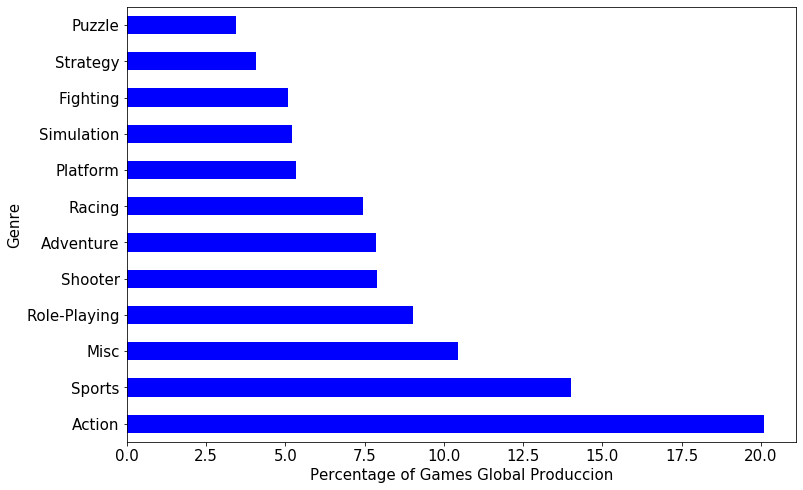

In [1035]:
((df["Genre"].value_counts() / df["Genre"].value_counts().sum()) *100).plot(kind="barh", fontsize=15, color="blue")
plt.ylabel("Genre", fontsize=15)
plt.xlabel("Percentage of Games Global Produccion", fontsize= 15);

In [1042]:
(df["Genre"].value_counts() / df["Genre"].value_counts().sum() *100)

Action          20.111868
Sports          14.019942
Misc            10.463278
Role-Playing     9.016294
Shooter          7.879377
Adventure        7.861138
Racing           7.453794
Platform         5.338035
Simulation       5.216440
Fighting         5.088765
Strategy         4.091683
Puzzle           3.459387
Name: Genre, dtype: float64

El 20.11 % de los videojuegos que se producen son de Acción seguido de Sport con un 14.01 %. El tipo de juego que menos producen los desarrolladores son de Strategy (4.091%) and Puzzel (3.45%)

## En el Siguiente gráfico podemos observar la evolución de la venta de videojuegos desde 1980 hasta 2020

In [440]:
def make_hist(n=5): 
    sns.distplot(df.Year_of_Release, bins=n)  
    
_= interact(make_hist, n = (5,100))

interactive(children=(IntSlider(value=5, description='n', min=5), Output()), _dom_classes=('widget-interact',)…

## Los años donde se vio un incremento significativo en la venta de videojuegos

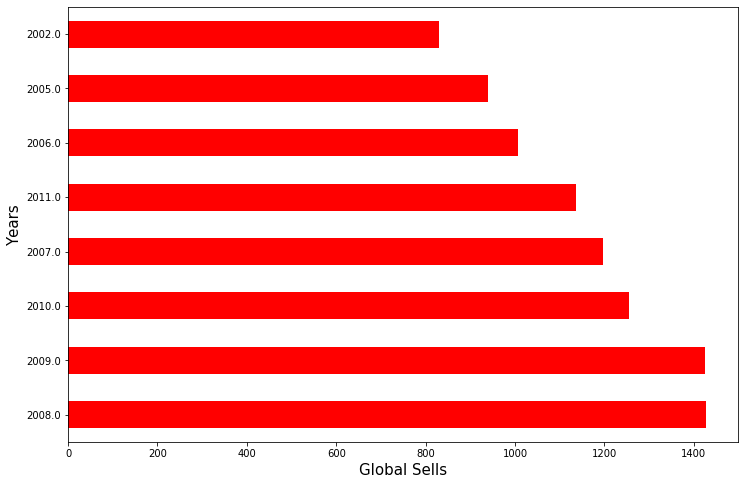

In [1038]:
df.Year_of_Release.value_counts().sort_values(ascending=False).head(8).plot(kind="barh",color= "red")
plt.ylabel("Years", fontsize=15)
plt.xlabel("Global Sells", fontsize= 15);

Podemos ver un incremento en las ventas de videojuegos desde el 2002 hasta el 2011 alcanzando su máximo de ventas en el 2009.

## Cuáles son las 20 mejores empresas de videojuegos por ventas?

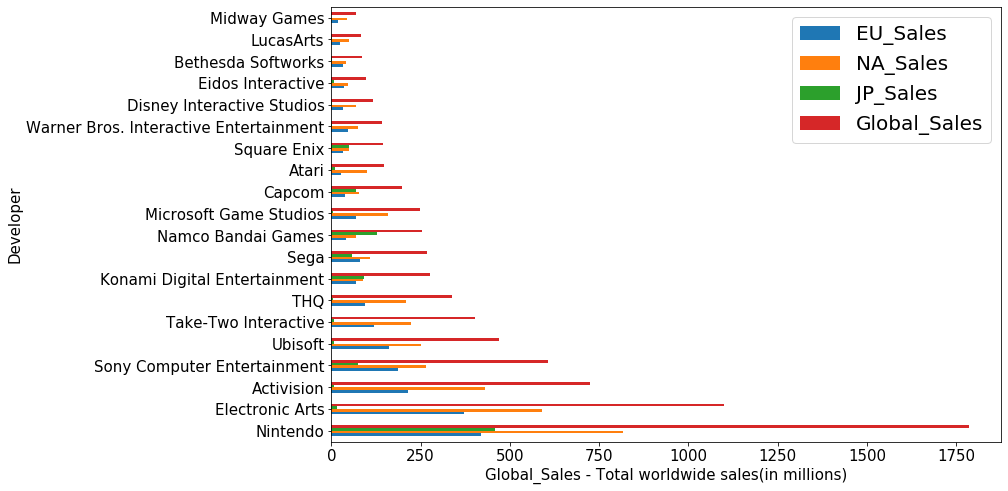

In [643]:
new.sort_values(ascending=False, by="Global_Sales").head(20).plot(kind="barh", fontsize=15)
plt.legend( prop={"size":20})
plt.ylabel("Developer", fontsize=15)
plt.xlabel("Global_Sales - Total worldwide sales(in millions)", fontsize= 15);

In [1103]:
GS= df.groupby("Genre")["Global_Sales"].sum()
GS

Genre
Action          1717.63
Adventure        233.46
Fighting         442.63
Misc             790.94
Platform         825.86
Puzzle           240.33
Racing           723.70
Role-Playing     930.90
Shooter         1041.83
Simulation       388.40
Sports          1310.39
Strategy         172.85
Name: Global_Sales, dtype: float64

In [1104]:
NJ=df.groupby("Genre")["Name"].count()
NJ

Genre
Action          3308
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1483
Shooter         1296
Simulation       858
Sports          2306
Strategy         673
Name: Name, dtype: int64

In [958]:
(GS/NJ).sort_values(ascending=False)

Genre
Platform        0.940615
Shooter         0.803881
Role-Playing    0.627714
Racing          0.590294
Sports          0.568252
Fighting        0.528829
Action          0.519235
Misc            0.459582
Simulation      0.452681
Puzzle          0.422373
Strategy        0.256835
Adventure       0.180557
dtype: float64

In [1102]:
Nintendo_production=(df[df["Developer"]== "Nintendo"].Genre.value_counts()/df[df["Developer"]== "Nintendo"].Genre.value_counts().sum()) *100

## Vamos a Analizar el rendimiento de Nintendo en los diferentes mercados con base en sus ventas globales

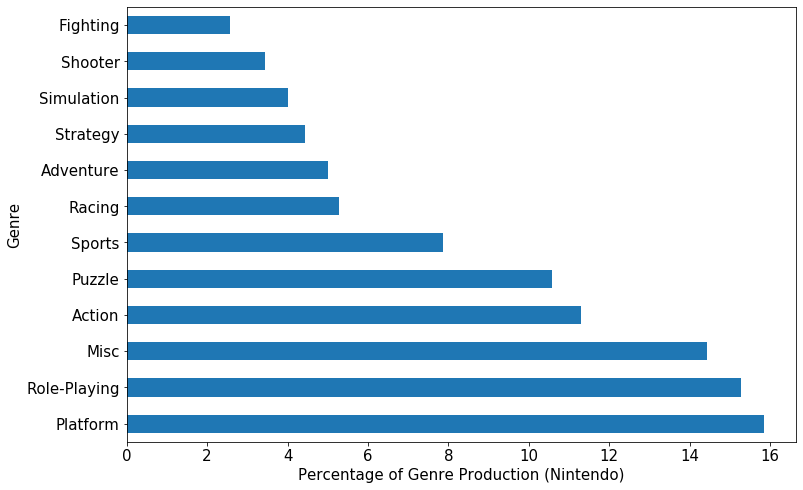

In [618]:
Nintendo_production.plot(kind="barh", fontsize=15) #The biggest seller of video games has a diversify kind of genre games.
plt.ylabel("Genre", fontsize=15)
plt.xlabel("Percentage of Genre Production (Nintendo)", fontsize= 15);

In [570]:
print(f'{round((111 /df[df["Developer"]== "Nintendo"].Genre.value_counts().sum()) *100,2)} % of the games that Nintendo produce are Platform') 

15.86 % of the games that Nintendo produce are Platform


## Cuál es la media de Ventas de Nintendo en sus 3 mercados principales?

In [987]:
Ventas_NA.mean()

1.1655142857142855

In [988]:
Ventas_JP.mean()

0.6539142857142851

In [1106]:
Ventas_EU.mean()

0.5979714285714285

##  Nos gustaría saber si hay una gran diferencia entre las ventas de Nintendo en Japon(JP) y en Norte America(NA)

In [1105]:
Ventas_EU=df[df["Developer"]== "Nintendo"]["EU_Sales"]

In [968]:
Ventas_NA=df[df["Developer"]== "Nintendo"]["NA_Sales"]

In [982]:
Ventas_JP=df[df["Developer"]== "Nintendo"]["JP_Sales"]

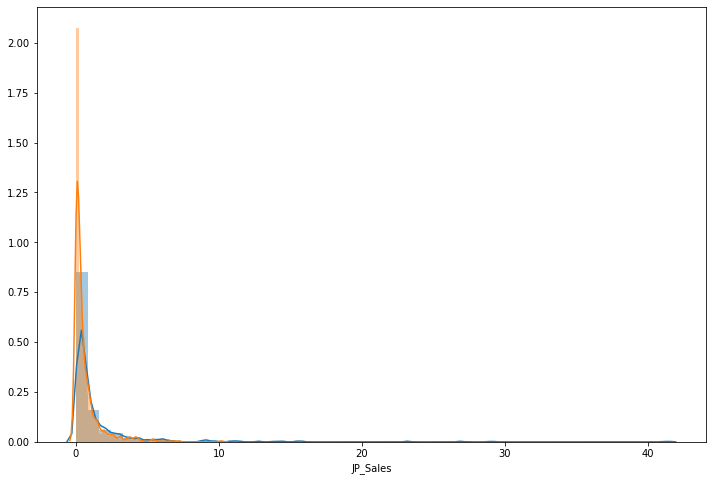

In [1047]:
sns.distplot(Ventas_NA)
sns.distplot(Ventas_JP);

Al realizar un gráfico con las ventas tanto en Norte América como en Japón observamos que necesitamos normalizar ambas variables para obtener una mejor visualización de ambos mercados.

In [1063]:
log_ventasNA=np.log(Ventas_NA)

C:\Users\AaronElias\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1064]:
(log_ventasNA == -np.inf).sum()

172

In [1065]:
log_ventasNA=log_ventas.replace(-np.inf, 0) # Necesitamos eliminar todos aquellos numeros que sean np.inf

In [1049]:
log_ventasJP=np.log(Ventas_JP)

In [1055]:
(log_ventasJP == -np.inf).sum() 

0

In [1054]:
log_ventasJP=log_ventasJP.replace(-np.inf, 0) # Necesitamos eliminar todos aquellos numeros que sean np.inf

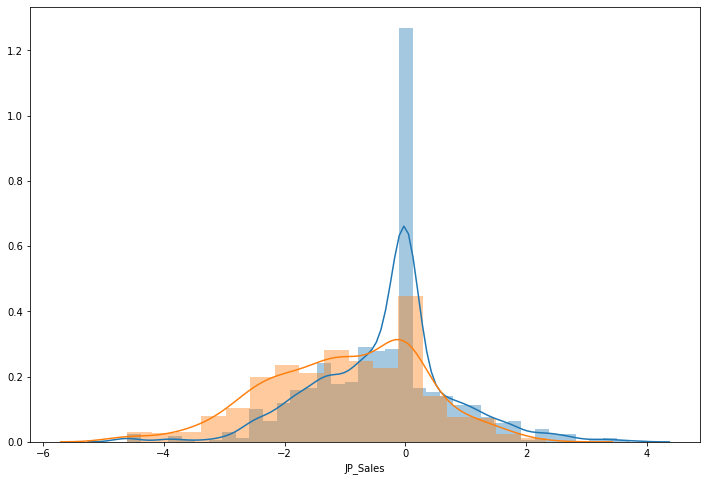

In [989]:
sns.distplot(log_ventasNA)
sns.distplot(log_ventasJP);

Una vez que normalizamos tenemos una mejor perspectiva de las ventas de Nintendo tanto en Norte America como en Japon

## Vamos a aplicar el Test de Anderson para ver si nuestra H0 de que las distribuciones son iguales

EL Test de Anderson nos confirma que la distribución de entre ambas ventas son diferentes por lo que rechazamos nuestra hipótesis nula que decía que las dos distribuciones eran iguales ( nos basamos en que el estadístico( JP == 3.43 || NA== 11.83 ) es mayor que el crítical valué (JP == 0.783 || NA == 0.783 ))

In [1062]:
 scipy.stats.anderson(log_ventasJP, dist='norm')

AndersonResult(statistic=3.433831594495814, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [1066]:
 scipy.stats.anderson(log_ventasNA, dist='norm')

AndersonResult(statistic=11.83971245915177, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [1068]:
alpha= 0.05

Shapiro nos confirma que la distribución no es normal, ya que el pValue(3.049805400223704e-06) es menor que 0.05 por lo que rechazamos la hipótesis nula que nos decía que las distribuciones eran iguales

In [1071]:
pvalue = scipy.stats.shapiro(log_ventasJP)
print(pvalue)
print(pvalue[1] < alpha) 

if (pvalue[1] < alpha):
    print("We reject H0, The distribution is not normal for the Japanese sales of Nintendo")
else: 
    print("We accept the H0")

(0.9859991669654846, 3.049805400223704e-06)
True
We reject H0, The distribution is not normal


In [1072]:
pvalue1 = scipy.stats.shapiro(log_ventasNA)
print(pvalue1)
print(pvalue1[1] < alpha) 

if (pvalue1[1] < alpha):
    print("We reject H0, The distribution is not normal for the North America sales of Nintendo")
else: 
    print("We accept the H0")

(0.9616788625717163, 1.4823307512012995e-12)
True
We reject H0, The distribution is not normal for the North America sales of Nintendo


## Realizamos un Test No-Parametrico Manwhitney

Realizamos un Test No-Parametrico entre las ventas en Norte América y Japón
Manwhitney nos dice que el pValue es mayor a 0.05 lo que aceptamos nuestra hipótesis nula (Que Nintendo vende relativamente lo mismo tanto en Norte América como en Japón)

In [1073]:
r=sp.stats.mannwhitneyu(Ventas_NA,Ventas_JP)
print(r)
print(r[1] < alpha) 

if (r[1] < alpha):
    print("We reject H0. The distribution is not normal for the North America sales of Nintendo")
else: 
    print("We accept the H0. The sells of Nintendo in North America and Japan are almost the same")

MannwhitneyuResult(statistic=236031.5, pvalue=0.11724501881643695)
False
We accept the H0. The sells of Nintendo in North America and Japan are almost the same


In [1206]:
new=pd.concat([EU,NA,JP,OS,Global], axis=1)


In [1205]:
OS=df.groupby("Developer").Other_Sales.sum()

In [1151]:
NA=df.groupby("Developer").NA_Sales.sum()

In [1175]:
EU=df.groupby("Developer").EU_Sales.sum()

In [1152]:
JP=df.groupby("Developer").JP_Sales.sum()


In [1148]:
Global=df.groupby("Developer").Global_Sales.sum()

## Aquí podemos observar las ventas totales por en los principales mercados

In [1207]:
@interact(n = [5,10,20,30,40,50,60])
def explore(n): 
    display(new.sort_values(ascending=False, by="Global_Sales").head(n))

interactive(children=(Dropdown(description='n', options=(5, 10, 20, 30, 40, 50, 60), value=5), Output()), _dom…

In [1208]:
new.corr()

,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
EU_Sales,1.000000,0.990026,0.677141,0.972950,0.984994
NA_Sales,0.990026,1.000000,0.708109,0.947460,0.991254
JP_Sales,0.677141,0.708109,1.000000,0.545294,0.785742
Other_Sales,0.972950,0.947460,0.545294,1.000000,0.932131
Global_Sales,0.984994,0.991254,0.785742,0.932131,1.000000


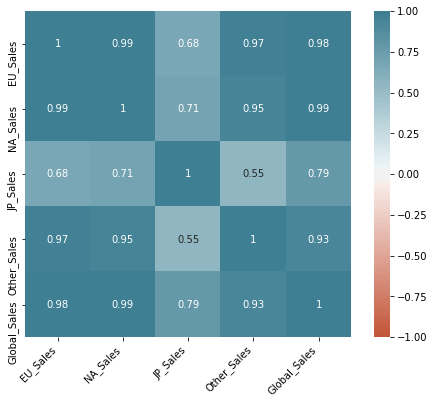

In [1209]:
corr = new.corr()

plt.subplots(figsize = (8, 6))

ax = sns.heatmap(
    corr, 
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

plt.show()

## Queremos saber la correlación entre las ventas Europeas y las ventas Norte Americanas

In [1210]:
r, _ = stats.pearsonr(new.EU_Sales, new.NA_Sales)
round(r,4)

0.99

In [1211]:
mx, my =  new[['EU_Sales', 'NA_Sales']].mean()
sx, sy = new[['EU_Sales', 'NA_Sales']].std()

b = r * sy / sx
a = my - b * mx

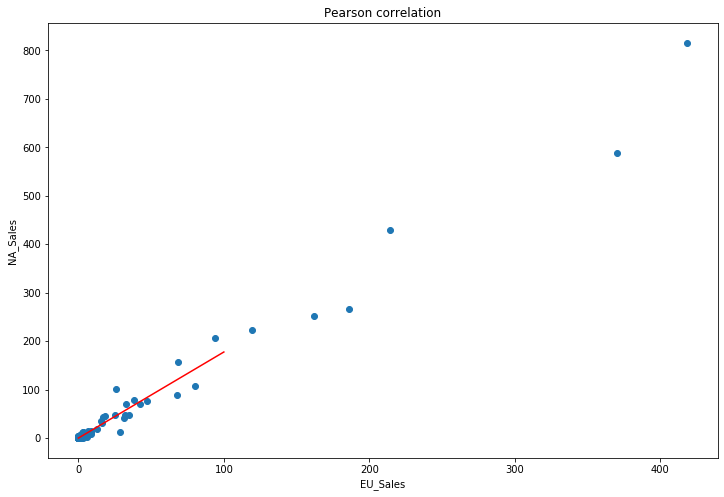

In [1212]:
plt.scatter(new.EU_Sales, new.NA_Sales)
plt.plot(x, a + b*x, c='red')
plt.gca().set_xlabel('EU_Sales')
plt.gca().set_ylabel('NA_Sales')
plt.gca().set_title('Pearson correlation');

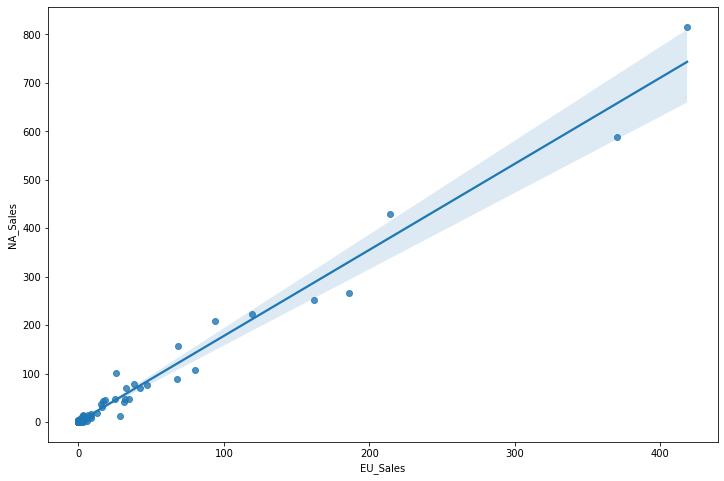

In [1186]:
sns.regplot(x='EU_Sales', y='NA_Sales', data=new);

Podemos concluir que hay una alta correlación entre las ventas europeas y Norte Americanas de un 0.99

# Confidence intervals

In [1221]:
new = new.reset_index()

In [1244]:
confidence = 0.95


In [1278]:
samples = [np.mean(stats.bernoulli(0.95).rvs(n)) for i in range(100)]


In [1279]:
n=len(df[df["Developer"] == "Nintendo"]["Global_Sales"])
n

700

In [1280]:
df[df["Developer"] == "Nintendo"]["Global_Sales"]

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16514     0.01
16579     0.01
16612     0.01
16656     0.01
16657     0.01
Name: Global_Sales, Length: 700, dtype: float64

In [1281]:
m=(df[df["Developer"] == "Nintendo"]["Global_Sales"]).mean()
m

2.55245714285714

In [1282]:
std=(df[df["Developer"] == "Nintendo"]["Global_Sales"]).std()
std

5.6485946159642015

In [1283]:
h = std * stats.t(n -1).ppf((1 + confidence) / 2)
h

11.090244924127159

In [1284]:
start = m - h
end = m + h

print('Confidence interval ({:.0f}%): {} - {}'.format(confidence*100, start,end))

Confidence interval (95%): -8.53778778127002 - 13.642702066984299


Podemos concluir que mi intervalo de confianza se ecuentra entre -8.53 y 13.64. Puede que mi muestra se vea alterada por los outliers de ventas.

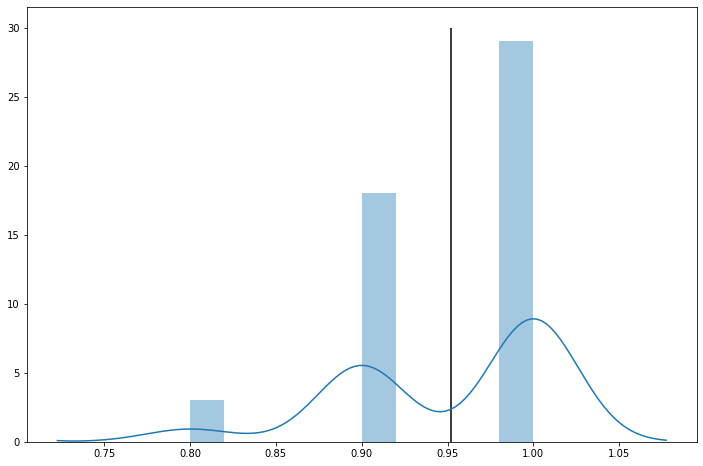

In [1285]:
sns.distplot(samples, bins=10)
plt.vlines(np.mean(samples), 0, 30)

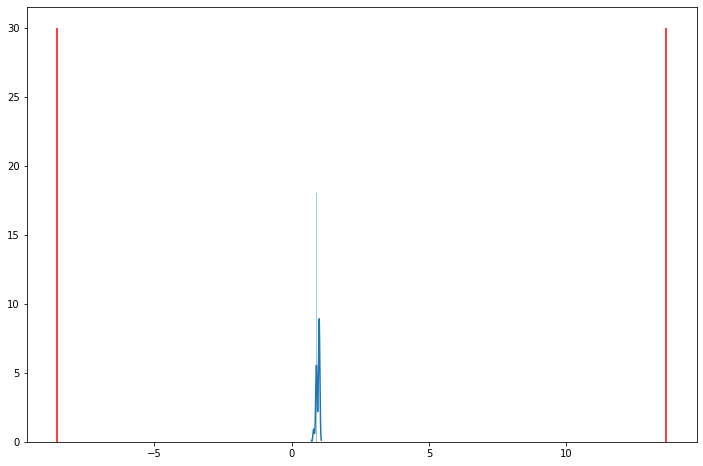

In [1286]:
sns.distplot(samples, bins=10)
plt.vlines([start, end], 0, 30, color='red');